# Project: Investigate a Dataset  - No Show Appointments 

Questions posed:
1. Average/mean by Age, Hypertensions, Diabetes, Alcoholism and Handicap. Identify the diagnoses with the highest reason for an appointment.
2. How many patients were male vs female
3. How many patients were no show vs show and the overal percentage
4. Compare female/male appointments and female/male no shows.
4. Neighborhoods listed from highest number of patients to lowest number of patients

Coded to perform analysis: Used Jupyter notebook

Websites, forums, etc. used for reference:
• Numpy and Panda Cheat Sheet
• Github
• Udacity Forums
• Python and Panda websites
• Stack Overflow
• GOOGLE (OMG – this was better than sliced bread)
• My notes
• Reviewers comments

My comments:
The intro to programming was very interesting to me. Having zero programming knowledge, I decided to choose the Data Analyst path, since I like root cause analysis, but this was more than what I expected. It was very hard for me to digest all the material. This was a bite-size introduction that was very hard for me. Having been exposed to NumPy Arrays and Pandas has made me think a bit more about my next step into programming. I did my best with the last project and used the resources that were available to me. I enjoyed getting to know what programming is about!!!

# Introduction

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [17]:
import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

no_show = read_csv('no_show_appointments.csv')

In [18]:
##verifying that the csv file is reachable
len(no_show)

110527

# Data Wrangling

### Importing the Data

In [19]:
df = pd.read_csv('no_show_appointments.csv')

### Data Summary

In [20]:
##summary of the mean, std and IQR values. 
##I was interested in the mean for Age, Hipertensions, Diabetes, Alcoholism and Handicap.

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [21]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Cleaning data by removing typos in the column headers

In [22]:
df.rename(columns = {'Hipertension': 'Hypertension',
                'Handcap': 'Handicap','No-show':'No_show'}, inplace = True)

print(df.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighborhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show'],
      dtype='object')


### Checking for errors in data

In [23]:
print('Age:',sorted(df.Age.unique()))
print('Gender:',df.Gender.unique())
print('Diabetes:',df.Diabetes.unique())
print('Alcoholism:',df.Alcoholism.unique())
print('Hypertension:',df.Hypertension.unique()) 
print('Handicap:',df.Handicap.unique()) 
print('Scholarship:',df.Scholarship.unique())
print('SMS_received:',df.SMS_received.unique())
print('No_show:',df.No_show.unique()) ##  ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Gender: ['F' 'M']
Diabetes: [0 1]
Alcoholism: [0 1]
Hypertension: [1 0]
Handicap: [0 1 2 3 4]
Scholarship: [0 1]
SMS_received: [0 1]
No_show: ['No' 'Yes']


### Remove age outliers

In [24]:
df = df[(df.Age >= 0) & (df.Age <= 95)]
df.shape

(110480, 14)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110480 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110480 non-null float64
AppointmentID     110480 non-null int64
Gender            110480 non-null object
ScheduledDay      110480 non-null object
AppointmentDay    110480 non-null object
Age               110480 non-null int64
Neighborhood      110480 non-null object
Scholarship       110480 non-null int64
Hypertension      110480 non-null int64
Diabetes          110480 non-null int64
Alcoholism        110480 non-null int64
Handicap          110480 non-null int64
SMS_received      110480 non-null int64
No_show           110480 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


# Exploration of data

Data depicts that there were more female patients

In [26]:
##how many female vs male  
df['Gender']  

0         F
1         M
2         F
3         F
4         F
5         F
6         F
7         F
8         F
9         F
10        F
11        M
12        F
13        M
14        F
15        F
16        M
17        F
18        F
19        F
20        F
21        F
22        M
23        F
24        F
25        M
26        F
27        F
28        M
29        F
         ..
110497    M
110498    F
110499    F
110500    F
110501    M
110502    F
110503    F
110504    F
110505    F
110506    M
110507    F
110508    F
110509    M
110510    F
110511    F
110512    F
110513    M
110514    F
110515    M
110516    F
110517    F
110518    F
110519    F
110520    F
110521    F
110522    F
110523    F
110524    F
110525    F
110526    F
Name: Gender, Length: 110480, dtype: object

In [27]:
##Obtained the total of female vs male patients

gender = df["Gender"].value_counts()
print(gender)



F    71802
M    38678
Name: Gender, dtype: int64


## Chart - Female vs Male Patients

,PatientId
Gender,
F,71802
M,38678


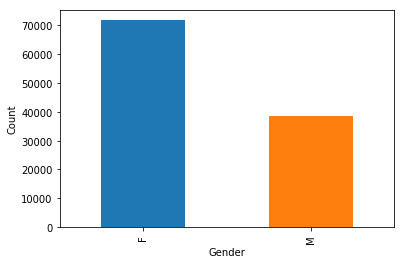

In [28]:
df.groupby(['Gender'])['PatientId'].count().plot(kind='bar').set_ylabel('Count')
df.groupby(['Gender'])[['PatientId']].count()

### Patients who missed their appointments

In [29]:
##the count and percent of who missed their scheduled appointments

no_show = df["No_show"].value_counts()
print(no_show)

percent_no_show = no_show[1]/ no_show.sum() * 100
print("Percent who miss their scheduled appointments:",percent_no_show )

No     88168
Yes    22312
Name: No_show, dtype: int64
Percent who miss their scheduled appointments: 20.195510499637944


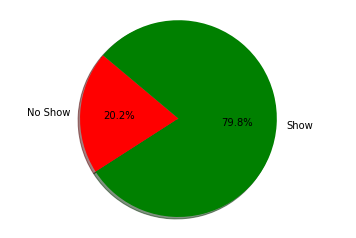

In [30]:
labels = 'No Show', 'Show'
sizes = [22312, 88168]
colors =['red', 'green']

plt.pie(sizes, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

### Patients who missed their appointments - Female vs. Male

Predict the patients that were no show based on female vs. male

No_show
Gender No_show         
F      No         57214
       Yes        14588
M      No         30954
       Yes         7724

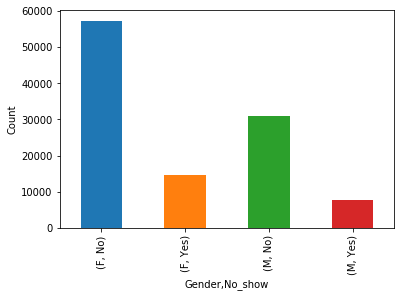

In [31]:
df.groupby(['Gender','No_show'])['No_show'].count().plot(kind='bar').set_ylabel('Count')
df.groupby(['Gender','No_show'])[['No_show']].count()

### Comparing Hypertension and No_show between female and male

No_show
Gender Hypertension          
F      0             0.788730
       1             0.826706
M      0             0.794848
       1             0.827501

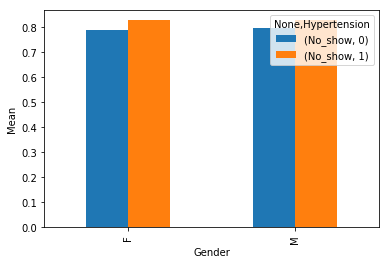

In [32]:
df['No_show']=pd.get_dummies(df['No_show'])
df.groupby(['Gender','Hypertension'])[['No_show']].mean().unstack().plot(kind='bar').set_ylabel('Mean')
df.groupby(['Gender','Hypertension'])[['No_show']].mean()

### Neighborhood with most appointments

In [33]:
##neighborhood with the most appts from largest to smallest
neighborhood = df["Neighborhood"].value_counts()
print(neighborhood)

JARDIM CAMBURI                 7714
MARIA ORTIZ                    5804
RESISTÊNCIA                    4431
JARDIM DA PENHA                3874
ITARARÉ                        3514
CENTRO                         3333
TABUAZEIRO                     3130
SANTA MARTHA                   3129
JESUS DE NAZARETH              2853
BONFIM                         2769
SANTO ANTÔNIO                  2743
SANTO ANDRÉ                    2570
CARATOÍRA                      2564
JABOUR                         2508
SÃO PEDRO                      2447
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2258
DA PENHA                       2217
ROMÃO                          2214
GURIGICA                       2018
SÃO JOSÉ                       1976
BELA VISTA                     1907
MARUÍPE                        1899
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

# My Conclusions

1. Obtained average/mean by Age, Hypertensions, Diabetes, Alcoholism and Handicap. Data depicts that hypertension is 
the most common diagnoses.
2. Data depicts more females made appointments.
3. Data depicts that 20% of patients were No Show.
4. Compared female and male appointments and female no shows and male no shows
5. Jardin Camburi had the most patient appointments and Parque Industrial had the least
